# Tutorial 3 - Working with Data

This tutorial provides examples on how to work with the pandas DataFrames returned by *IBM SMF Explorer*. 

## Working with data in Python

After data is fetched, you can process it with the help of python libraries. Consider importing the ```pandas``` package.

To get started you can refer to:

- [pandas documentation](https://pandas.pydata.org/docs/)
- [Pandas Tutorial: DataFrames in Python](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)

Below we provide a couple of examples that will help you to get started.


In [1]:
# import pandas
import pandas as pd


# create a df
data = {
    "Timestamp": [
        "2022-01-01 12:00:00",
        "2022-01-01 12:05:00",
        "2022-01-01 12:10:00",
        "2022-02-01 12:15:00",
        "2022-01-01 12:00:00",
    ],
    "SID": ["SYSA", "SYSA", "SYSA", "SYSA", "SYSB"],
    "sys_utilization": [50, 55, 53, 70, 10],
    "sys_utilization2": [50, 55, 53, 70, 10],
}

df = pd.DataFrame(data)

# convert timestamp column to a date-time format.
# Important: timestamp column generated with IBM SMF Explorer is already in the right format.
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df

,Timestamp,SID,sys_utilization,sys_utilization2
0,2022-01-01 12:00:00,SYSA,50,50
1,2022-01-01 12:05:00,SYSA,55,55
2,2022-01-01 12:10:00,SYSA,53,53
3,2022-02-01 12:15:00,SYSA,70,70
4,2022-01-01 12:00:00,SYSB,10,10


### Columns
if you want to rename one or multiple columns, you may use the [```rename()```function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

In [2]:
df = df.rename(columns={"SID": "system"})
df

,Timestamp,system,sys_utilization,sys_utilization2
0,2022-01-01 12:00:00,SYSA,50,50
1,2022-01-01 12:05:00,SYSA,55,55
2,2022-01-01 12:10:00,SYSA,53,53
3,2022-02-01 12:15:00,SYSA,70,70
4,2022-01-01 12:00:00,SYSB,10,10


if you want to remove columns from the DataFrame, you can refer to the [```drop()``` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html):

In [3]:
df = df.drop(columns=["sys_utilization2"])
df

,Timestamp,system,sys_utilization
0,2022-01-01 12:00:00,SYSA,50
1,2022-01-01 12:05:00,SYSA,55
2,2022-01-01 12:10:00,SYSA,53
3,2022-02-01 12:15:00,SYSA,70
4,2022-01-01 12:00:00,SYSB,10


### Time filtering

To filter by date you may use the DataFrame [```loc``` property](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html):

In [4]:
# filter out '2022-02-01'
df_date = df.loc[df["Timestamp"] < "2022-02-01"]
display(df_date)

# filter out date range
df_date_range = df.loc[
    (df["Timestamp"] > "2022-01-01 12:05") & (df["Timestamp"] < "2022-02-01")
]
display(df_date_range)

,Timestamp,system,sys_utilization
0,2022-01-01 12:00:00,SYSA,50
1,2022-01-01 12:05:00,SYSA,55
2,2022-01-01 12:10:00,SYSA,53
4,2022-01-01 12:00:00,SYSB,10


,Timestamp,system,sys_utilization
2,2022-01-01 12:10:00,SYSA,53


### Data filtering

You can filter data either with the help of the DataFrame ```loc``` property as shown above, or you may consider the following methods:

In [5]:
# query()
display(df.query('system == "SYSA" & sys_utilization > 50'))

# df filtering
display(df[(df["system"] == "SYSA") & (df["sys_utilization"] > 50)])

,Timestamp,system,sys_utilization
1,2022-01-01 12:05:00,SYSA,55
2,2022-01-01 12:10:00,SYSA,53
3,2022-02-01 12:15:00,SYSA,70


,Timestamp,system,sys_utilization
1,2022-01-01 12:05:00,SYSA,55
2,2022-01-01 12:10:00,SYSA,53
3,2022-02-01 12:15:00,SYSA,70


## The *IBM SMF Explorer* names() Function

*IBM SMF Explorer* provides the `names()` function to help with pandas interaction.
The example below shows how you can use this helper to access only specific fields from the DataFrame.

But first, we need to create a Context and import ```names```.



In [6]:
import smfexplorer
from datetime import datetime, time
from smfexplorer.fields import SMF70S1
from smfexplorer import names

DATASET = "YOUR.SMF.DATA"

ctx = smfexplorer.new_context(DATASET)

In [ ]:
df = ctx.samples.lpar_information().run()

# create a subset of data
lpar_count = df[
    names(SMF70S1.timestamp, SMF70S1.lpar_system_name, SMF70S1.lpar_cpu_count)
]
lpar_count

,timestamp,lpar_system_name,lpar_cpu_count
0,2019-07-25 00:29:35.070,J80-J80,88
1,2019-07-25 00:29:35.070,CF22-,1
2,2019-07-25 00:29:35.070,CF3-,6
3,2019-07-25 00:29:35.070,CT2-CT2,15
4,2019-07-25 00:29:35.070,JA0-JA0,84
...,...,...,...
247,2019-07-25 05:59:35.080,<NA>,0
248,2019-07-25 05:59:35.080,Z2-Z2,35
249,2019-07-25 05:59:35.080,<NA>,0
250,2019-07-25 05:59:35.080,ISKLMLX1-,1


The call above is equivalent to the following call, but allows the code to be clearer about the intention.
In addition the `names()` function allows the code to be consistent and work in future releases.

In [9]:
lpar_count_without_names = df[["timestamp", "lpar_system_name", "lpar_cpu_count"]]
lpar_count_without_names

,timestamp,lpar_system_name,lpar_cpu_count
0,2019-07-25 00:29:35.070,J80-J80,88
1,2019-07-25 00:29:35.070,CF22-,1
2,2019-07-25 00:29:35.070,CF3-,6
3,2019-07-25 00:29:35.070,CT2-CT2,15
4,2019-07-25 00:29:35.070,JA0-JA0,84
...,...,...,...
247,2019-07-25 05:59:35.080,<NA>,0
248,2019-07-25 05:59:35.080,Z2-Z2,35
249,2019-07-25 05:59:35.080,<NA>,0
250,2019-07-25 05:59:35.080,ISKLMLX1-,1


One important thing to know about the `names()` function is that it behaves differently when only one argument is given.
If you just pass one field argument, `names()` returns a string with the name in it.
In all other cases, it returns a list of strings.

The example below demonstrates what that means for pandas.

In [10]:
# generates series
lpar_cpu = df[names(SMF70S1.lpar_cpu_count)]
# generates DataFrame
lpar_cpu2 = df[names([SMF70S1.lpar_cpu_count])]

print(type(lpar_cpu))
print(type(lpar_cpu2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


When executing the cell above you should see that pandas creates a Series instead of a DataFrame if it is called with just one field.
If you want to force `names()` to return a list you can give it a list of fields with just one entry(see `lpar_cpu2`).
This difference is something you need to be aware of when using the `names()` function.

###  Pandas and *IBM SMF Explorer* Examples

The `names()` function allows you to use pandas in a very straightforward way.

In this section, you will find some examples on both pandas and *IBM SMF Explorer*.

In [11]:
# Get all Systems included in the dump

systems = df[names(SMF70S1.sid)].unique()

print(systems.tolist())

['J80']


In [12]:
# Get the average of LPAR CPU Count per LPAR
df_avg = df.groupby(by=names(SMF70S1.lpar_system_name), dropna=True).mean(
    numeric_only=True
)
display(df_avg)

# get the average of LPAR CPU Count
avg = df_avg[names(SMF70S1.lpar_cpu_count)].mean()
print("Average LPAR CPU count is ", avg)

,lpar_number,lpar_cpu_count
lpar_system_name,,
CF22-,1.0,1.0
CF3-,2.0,6.0
CT2-CT2,3.0,15.0
ISKLMLX1-,27.0,1.0
J80-J80,7.0,88.0
JA0-JA0,4.0,84.0
JE0-JE0,5.0,9.0
JH0-JH0,6.0,46.0
TPN-TPN,8.0,8.0


Average LPAR CPU count is  28.083333333333332


## How IBM SMF Explorer represents data

As you have seen, IBM SMF Explorer returns data as tables.
This means that SMF Explorer flattend the original SMF structure into entries in those tables.

If you have installed [Graphviz](https://graphviz.org/) during setup, you can use the `graph()` function on a request to get a visual representation of the SMF structure.

The following example will show the structure for the fields of the `lpar_information()` sample (If you don't have graphviz installed take a look at **Tutorial 3 Screenshot 1.png**):

- **Octagon(3x)**: The SMF record
- **Octagon(2x)**: A map/section in the record with relation to the parent
- **Note**: List of fields without children
- **Oval**: Field with at least one child element
    - **Blue Oval**: Virtual field

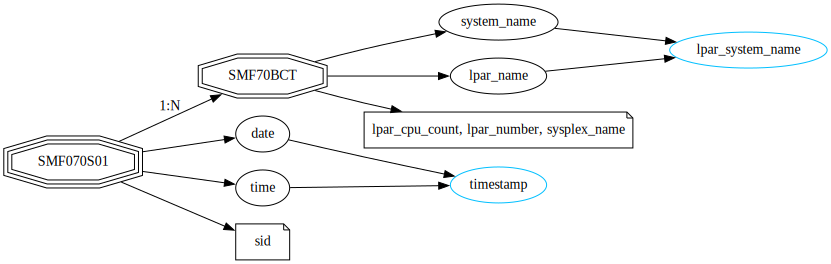

In [13]:
# If graphviz is available, this will show the structure of the request.
ctx.samples.lpar_information().graph()

In the example above you can see that the section `SMF70BCT` has a one-to-many relationship with the SMF 70 subtype 1 record.
When SMF Explorer encounters a one-to-many relationship, it does a _Outer Left Join_ for that section.
For the example SMF Explorer creates one entry in the resulting table for each `SMF70BCT` section.

If you want to identify the section/record an entry in the table belongs to, SMF Explorer can insert index columns into the result.
This can be done by adding `indices=True` to the `run()` function or explicitly requesting the index fields:

In [14]:
# Request LPAR information with all index fields
ctx.samples.lpar_information().run(indices=True)

# This would result in the same table as the above call but explicitly adds the index fields.
# ctx.samples.lpar_information().run(display=[SMF70S1.record.index, SMF70S1.SMF70BCT.index])

,timestamp,sid,lpar_name,system_name,sysplex_name,lpar_system_name,lpar_number,lpar_cpu_count,smf07001_index,smf07001_smf70bct_index
0,2019-07-25 00:29:35.070,J80,J80,J80,UTCPLXJ8,J80-J80,7,88,1,1
1,2019-07-25 00:29:35.070,J80,CF22,,<NA>,CF22-,1,1,1,2
2,2019-07-25 00:29:35.070,J80,CF3,,<NA>,CF3-,2,6,1,3
3,2019-07-25 00:29:35.070,J80,CT2,CT2,CT2PLEX,CT2-CT2,3,15,1,4
4,2019-07-25 00:29:35.070,J80,JA0,JA0,UTCPLXJ8,JA0-JA0,4,84,1,5
...,...,...,...,...,...,...,...,...,...,...
247,2019-07-25 05:59:35.080,J80,JJ0,<NA>,<NA>,<NA>,24,0,9,24
248,2019-07-25 05:59:35.080,J80,Z2,Z2,ZPETPLX2,Z2-Z2,25,35,9,25
249,2019-07-25 05:59:35.080,J80,CT1,<NA>,<NA>,<NA>,26,0,9,26
250,2019-07-25 05:59:35.080,J80,ISKLMLX1,,<NA>,ISKLMLX1-,27,1,9,27


As you can see in the example above the returned table has two additional columns (`smf07001_index` and `smf07001_smf70bct_index`).
Depending on your systems LPAR structure, you will see that there are multiple entries with `smf07001_index` equal to 1.
This is what we expected as there are multiple `SMF70BCT` sections for each record.

Index fields can be used like any other field.
This means you can use them in `names()`, for sorting, or filtering.
As the LPAR information rarely changes from one record to the other let us limit the request to just the first record.

In [15]:
# Just request the first record
ctx.samples.lpar_information().where(SMF70S1.record.index == 1).run(indices=True)

,timestamp,sid,lpar_name,system_name,sysplex_name,lpar_system_name,lpar_number,lpar_cpu_count,smf07001_index,smf07001_smf70bct_index
0,2019-07-25 00:29:35.070,J80,J80,J80,UTCPLXJ8,J80-J80,7,88,1,1
1,2019-07-25 00:29:35.070,J80,CF22,,<NA>,CF22-,1,1,1,2
2,2019-07-25 00:29:35.070,J80,CF3,,<NA>,CF3-,2,6,1,3
3,2019-07-25 00:29:35.070,J80,CT2,CT2,CT2PLEX,CT2-CT2,3,15,1,4
4,2019-07-25 00:29:35.070,J80,JA0,JA0,UTCPLXJ8,JA0-JA0,4,84,1,5
5,2019-07-25 00:29:35.070,J80,JE0,JE0,UTCPLXJ8,JE0-JE0,5,9,1,6
6,2019-07-25 00:29:35.070,J80,JH0,JH0,UTCPLXJ8,JH0-JH0,6,46,1,7
7,2019-07-25 00:29:35.070,J80,TPN,TPN,UTCPLXJ8,TPN-TPN,8,8,1,8
8,2019-07-25 00:29:35.070,J80,Z1,<NA>,<NA>,<NA>,9,0,1,9
9,2019-07-25 00:29:35.070,J80,Z4,<NA>,<NA>,<NA>,10,0,1,10


Because of the _Outer Left Join_ behavior of SMF Explorer, there are some limitations you need to be aware of.
Fetching fields from a few sections at the same time is usually not an issue for SMF Explorer.
If to many sections with one-to-many relationships are requested the amount of entries returned can exceed the available memory(RAM) on your workstation.

> **The Problem**
> Some SMF sections can have more than 100 entries per record and the amount if entries in the result is the prodcut of the number of records and sections per record.
> If you try to fetch all fields from SMF 70 subtype 1 for example, the number of resulting entries can quickly exceed 10 million.
> Not only can you reach the limit of your worstation but the data that would be returned is highly redundant.
>
> Currently SMF Explorer has no mechanism to prevent you from fetching to much data and might get stuck/slow if your workstation runs out of memory.

To prevent you from running out of memory and to make processing of the fetched data easier, you should follow some rules:
- Try not to fetch to many fields from sections with one-to-many relationships
- Use the `graph()` function or the provided _Mappings_ documentation for information on the SMF sections.
- Use multiple requests to fetch data from different sections and use pandas and python to combine the data.
- **!!** Never try to fetch all fields of a SMF type without knowing the structure of that record **!!**
